In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg
from models.pred_dist_classification import *
from utils.utils import *

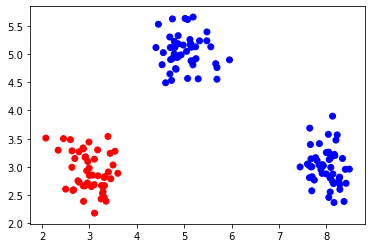

In [6]:
N1 = 50
N2 = 50
N3 = 50
K = 2

sigma1 = 0.1
sigma2 = 0.1
sigma3 = 0.1

mean1 = (3,3)
mean2 = (5,5)
mean3 = (8,3)


T, X, color = generate_data_outlier(N1, N2, N3, K, sigma1, sigma2, sigma3, \
                                          mean1, mean2, mean3,\
                                          negative_class_indicator=-1)

plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color)
plt.show()

Implement the predictive distribution, where the output is a decision whether a given point belongs to C1 or C2.

In [8]:
# obtain initial w_matrix with using least squares solution

def compute_w_bar(X_matrix_, y_values):
    """
    compute w_bar using least squares solution.
    """
    
    w_bar = np.dot(np.linalg.pinv(X_matrix_), y_values)
    return w_bar

## append column of 1s for offset
offset_col = np.ones((len(X), 1))
X_new = np.append(offset_col, X, axis=1)



# compute W_bar
W_bar = compute_w_bar(X_new, T)

In [9]:
#obtain t_vector
t_vector = np.array([])
for arr in T:
    t_val = np.argwhere(arr==1)+1
    class_ = t_val%2
    t_vector = np.append(t_vector, class_)
t_vector = np.reshape(t_vector, (len(t_vector), 1))

In [10]:
newton_raphson = newton_raphson_update()

alpha_inv = 0.01
w_init_ = W_bar[:, 0] 
w_init_ = np.reshape(w_init_, (len(w_init_), 1))
w_map, y_vector = newton_raphson.update_weights(alpha_inv, w_init_, X_new, t_vector, 100)

The estimate has converged after 100 iterations.


In [11]:
S_n = linalg.inv(newton_raphson.compute_hessian(X_new, y_vector))

In [12]:
yaxis_range = np.linspace(0,10, num=50)
xaxis_range = np.linspace(0,10, num=50)

X_to_plot = np.zeros((50, 50))

predictive_dist = predictive_distribution()
assigned_classes = np.array([])

for i in range(len(xaxis_range)):
    x1 = xaxis_range[i]
    for j in range(len(yaxis_range)):
        x2 = yaxis_range[j]
        X_mat_ = np.array([[1, x1, x2]])
        t_star_ = predictive_dist.compute_predictions(w_map, S_n, X_mat_)
        class_ = predictive_dist.compute_assigned_class(t_star_)
        assigned_classes = np.append(assigned_classes, class_)
        
        X_to_plot[i, j] = t_star_
    

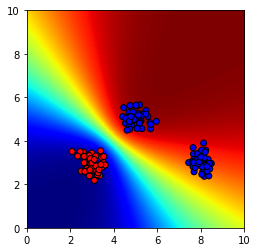

In [15]:
T, X, color = generate_data_outlier(N1, N2, N3, K, sigma1, sigma2, sigma3, \
                                          mean1, mean2, mean3,\
                                          negative_class_indicator=-1)

plt.scatter(X[:, 0], X[:, 1], marker = 'o', c = color, edgecolors='black')

#we plot 1-prob to contrast the scatterplot against the colourmap

plt.imshow(1-X_to_plot, origin='lower', 
           extent =[0,10,0,10], 
            interpolation='bilinear', cmap = 'jet')


Ask the user to enter any new value of x, and your task is to provide the decision whether it belongs to C1 or C2, and its uncertainty information.

In [14]:
x1_user = input("Please enter a value for x1:")
x2_user = input("Please enter a value for x2:")

X_user = np.array([[1, float(x1_user), float(x2_user)]])
t_star_user = predictive_dist.compute_predictions(w_map, S_n, X_user)

if t_star_user >=0.5:
    t_class = 1
else:
    t_class = 0
    
print(f"The datapoint was assigned a probability of {t_star_user[0]}, and hence belongs to class {t_class}.")
    

Please enter a value for x1:1.0
Please enter a value for x2:4.5
The datapoint was assigned a probability of 0.8801502836987045, and hence belongs to class 1.
